In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency, pointbiserialr

In [2]:
# Read dataset
df = pd.read_csv('datasets/3. online_shoppers_intention_clean.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.00,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.00,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.00,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.00,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.00,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12219,0,0.00,2,20.2,11,473.833333,0.000000,0.025000,0.0,0.0,June,3,2,8,3,Returning_Visitor,False,False
12220,1,27.00,2,22.0,16,408.250000,0.000000,0.014118,0.0,0.0,May,4,1,1,4,Returning_Visitor,False,False
12221,7,53.25,0,0.0,42,650.033333,0.004348,0.006522,0.0,0.0,May,2,2,2,4,Returning_Visitor,False,False
12222,3,36.00,2,16.0,74,4377.708157,0.020000,0.029309,0.0,0.0,Nov,1,2,3,2,Returning_Visitor,False,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12224 entries, 0 to 12223
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12224 non-null  int64  
 1   Administrative_Duration  12224 non-null  float64
 2   Informational            12224 non-null  int64  
 3   Informational_Duration   12224 non-null  float64
 4   ProductRelated           12224 non-null  int64  
 5   ProductRelated_Duration  12224 non-null  float64
 6   BounceRates              12224 non-null  float64
 7   ExitRates                12224 non-null  float64
 8   PageValues               12224 non-null  float64
 9   SpecialDay               12224 non-null  float64
 10  Month                    12224 non-null  object 
 11  OperatingSystems         12224 non-null  int64  
 12  Browser                  12224 non-null  int64  
 13  Region                   12224 non-null  int64  
 14  TrafficType           

In [4]:
for col in df:
    print(col, ": ",df[col].unique(), "\n")

Administrative :  [ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26] 

Administrative_Duration :  [  0.         53.         64.6       ... 167.9107143 305.125
 150.3571429] 

Informational :  [ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13] 

Informational_Duration :  [  0.   120.    16.   ... 547.75 368.25 211.25] 

ProductRelated :  [  1   2  10  19   0   3  16   7   6  23  13  20   8   5  32   4  45  14
  52   9  46  15  22  11  12  36  42  27  90  18  38  17 128  25  30  21
  51  26  28  31  24  50  96  49  68  98  67  55  35  37  29  34  71  63
  87  40  33  54  64  75  39 111  81  61  47  44  88 149  41  79  66  43
 258  80  62  83 173  48  58  57  56  69  82  59 109 287  53  84  78 137
 113  89  65  60 104 129  77  74  93  76  72 194 140 110 132 115  73 328
 160  86 150  95 130 151 117 124 127 125 116 105  92 157 154 220 187 112
 131 159  94 204 142 206 102 313 145  85  97 198 181 126 106 101 108 119
  70 122  91 276 100 291 114 172 217 141 1

# For "Weekend" and "Revenue" features, turn the boolean values into 1 and 0

In [5]:
# Convert 'Revenue' and 'Weekend' to integers
df['Revenue'] = df['Revenue'].astype(int)
df['Weekend'] = df['Weekend'].astype(int)

# Check the result
print(df[['Revenue', 'Weekend']].head())

   Revenue  Weekend
0        0        0
1        0        0
2        0        0
3        0        0
4        0        1


According to https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset:

The dataset is made out of 10 numerical and 8 categorical attributes. \
The 'Revenue' attribute is the target attribute.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year..

# Levels of measurement of each feature

Administrative: Ratio \
Represents number of pages visited for this type. Has a true zero point (aka, no pages were accessed), and calculating the difference or ratios between the number of pages visited is meaningful (eg, 3 pages visited is 2 pages less than 5 pages visited, visiting 10 pages is 2 times as much as visiting 5 pages).


Administrative_Duration: Ratio \
Represents the amount of time spent on pages of this type. Has a true zero point (aka spent no time on pages), and calculating the difference or ratios between time spent is meaningful (eg, 60 seconds spent is 20 seconds longer than 40 seconds, 2 minutes spent is 2 times longer than 1 minute).

Informational: Ratio \
Represents number of pages visited for this type. Has a true zero point (aka, no pages were accessed), and calculating the difference or ratios between the number of pages visited is meaningful (eg, 3 pages visited is 2 pages less than 5 pages visited, visiting 10 pages is 2 times as much as visiting 5 pages).

Informational_Duration: Ratio \
Represents the amount of time spent on pages of this type. Has a true zero point (aka spent no time on pages), and calculating the difference or ratios between time spent is meaningful (eg, 60 seconds spent is 20 seconds longer than 40 seconds, 2 minutes spent is 2 times longer than 1 minute).

ProductRelated: Ratio \
Represents number of pages visited for this type. Has a true zero point (aka, no pages were accessed), and calculating the difference or ratios between the number of pages visited is meaningful (eg, 3 pages visited is 2 pages less than 5 pages visited, visiting 10 pages is 2 times as much as visiting 5 pages).

ProductRelated_Duration: Ratio \
Represents the amount of time spent on pages of this type. Has a true zero point (aka spent no time on pages), and calculating the difference or ratios between time spent is meaningful (eg, 60 seconds spent is 20 seconds longer than 40 seconds, 2 minutes spent is 2 times longer than 1 minute).

BounceRates: Ratio \
https://www.trafficguard.ai/blog/everything-you-need-to-know-about-bounce-rate-in-google-analytics-4 \
It is a numerical representation in percentage (which has a meaningful zero, i.e. 0% bounce rate = no bounce occurred). Ratios of bounce rate percentage is meaningful as well.

ExitRates: Ratio \
https://clictadigital.com/what-is-a-good-exit-rate-in-google-analytics/ \
It is a numerical representation in percentage (which has a meaningful zero, i.e. 0% exit rate = no exit occurred). Ratios of exit rate percentage is meaningful as well.

PageValues: Ratio \
https://infotrust.com/articles/a-guide-to-page-value/#:~:text=Google%20Analytics%20Page%20Value%20Report,(pageviews)%20to%20that%20page \
Represents the average value for a page that the user visited before a transaction was completed. It has a meaningful zero (i.e. 0 = pages that were visited did not generate any value). Ratios are also meaningful (page with value 100 is 10 times more impactful for revenue generation than a page with value 10).

SpecialDay: Interval \
This feature represents (from 0.0 to 1.0) how close a visit is to a special day, and values increase as the special day approaches. Saying that a day is two times more special than another day doesn't make much sense as we only understand that one day is further or closer to the special event.

Months: Ordinal / Nominal (depending on context) \
Months of each year does have an order but intervals are not equal as different months have different number of days (28 - 31 days). \
Can be nominal as well, if the order of the months is not important, and we want to see the months as saperate categories on their own.

OperatingSystems: Nominal \
Representation of categories of operating systems with no order.

Browser: Nominal \
Representation of categories of web browsers with no order.

Region: Nominal \
Representation of categories of regions with no order.

TrafficType: Nominal \
Representation of categories of type of traffic with no order.

VisitorType: Nominal \
This feature categorises visitors into types such as "Returning_Visitor", "New_Visitor", or "Other" without any order.

Weekend: Nominal \
This feature is a boolean value that shows either true or false. Aka: presence or absence of a condition.

Revenue: Nominal \
This feature is a boolean value that shows either true or false. Aka: presence or absence of a condition.

In [6]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
count,12224.000000,12224.000000,12224.000000,12224.000000,12224.000000,12224.000000,12224.000000,12224.000000,12224.000000,12224.000000,12224.000000,12224.000000,12224.000000,12224.000000,12224.000000,12224.000000
mean,2.337205,81.538531,0.508426,34.776085,32.026832,1206.227466,0.020482,0.041567,5.627931,0.061993,2.124427,2.356757,3.152814,4.072153,0.234130,0.156168
std,3.329096,177.376839,1.274972,141.320666,44.573409,1918.809457,0.045456,0.046319,18.202080,0.199718,0.906933,1.709089,2.401773,4.015111,0.423471,0.363030
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,192.745833,0.000000,0.014257,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.408333,0.002927,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,4.000000,94.600000,0.000000,0.000000,38.000000,1476.350000,0.016667,0.048679,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000


# Univariate Analysis

In [7]:
# List of categorical columns
categorical_cols = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

# List of anonymised columns
anonymized_cols = ['OperatingSystems', 'Browser', 'Region', 'TrafficType']

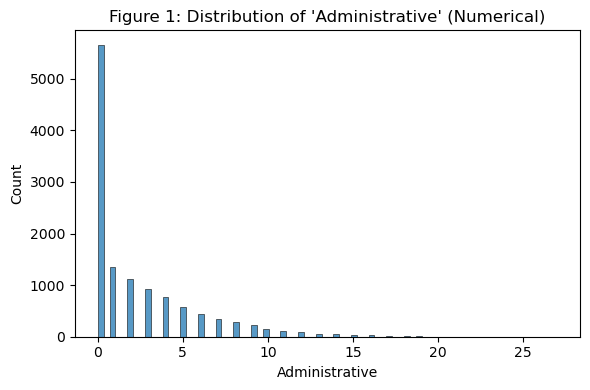

In [8]:
# Column to plot
col = 'Administrative'

plt.figure(figsize=(6, 4))

# Create a histogram for the numerical column
sns.histplot(data=df, x=col)

# Set the plot title
plt.title(f"Figure 1: Distribution of '{col}' (Numerical)")

plt.xlabel(col)
plt.ylabel('Count')

plt.tight_layout()
plt.show()


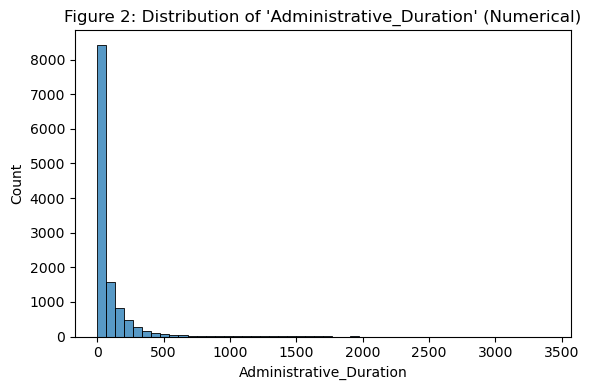

In [9]:
# Column to plot
col = 'Administrative_Duration'

plt.figure(figsize=(6, 4))

# Create a histogram for the numerical column
sns.histplot(data=df, x=col, bins=50)

# Set the plot title
plt.title(f"Figure 2: Distribution of '{col}' (Numerical)")

plt.xlabel(col)
plt.ylabel('Count')

plt.tight_layout()
plt.show()


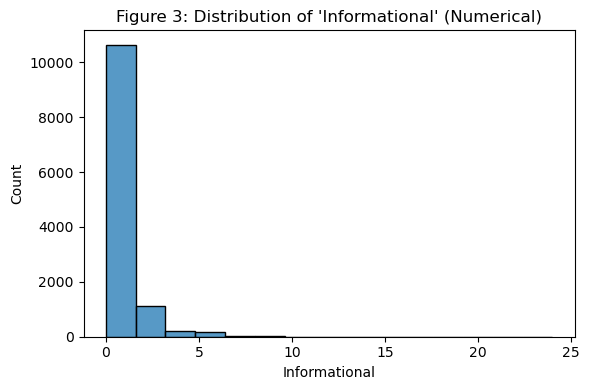

In [10]:
# Column to plot
col = 'Informational'

plt.figure(figsize=(6, 4))

# Create a histogram for the numerical column
sns.histplot(data=df, x=col)

# Set the plot title
plt.title(f"Figure 3: Distribution of '{col}' (Numerical)")

plt.xlabel(col)
plt.ylabel('Count')

plt.tight_layout()
plt.show()

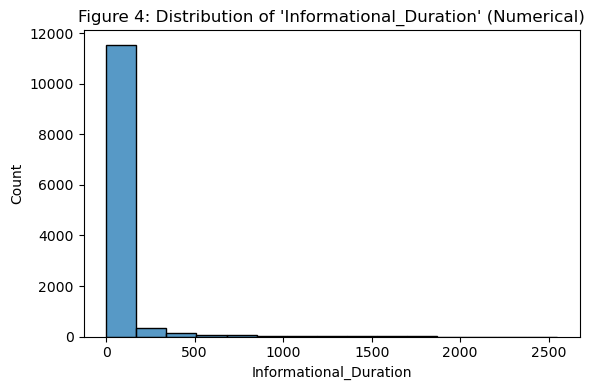

In [11]:
# Column to plot
col = 'Informational_Duration'

plt.figure(figsize=(6, 4))

# Create a histogram for the numerical column
sns.histplot(data=df, x=col)

# Set the plot title
plt.title(f"Figure 4: Distribution of '{col}' (Numerical)")

plt.xlabel(col)
plt.ylabel('Count')

plt.tight_layout()
plt.show()

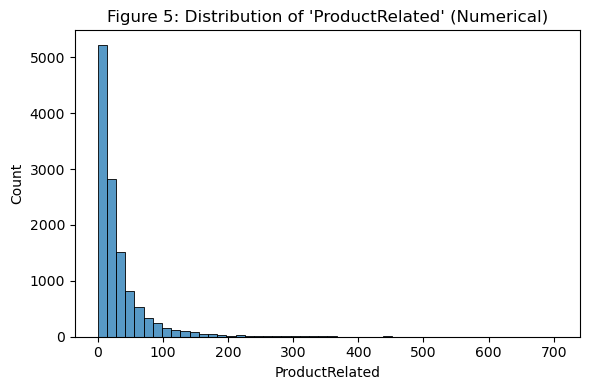

In [12]:
# Column to plot
col = 'ProductRelated'

plt.figure(figsize=(6, 4))

# Create a histogram for the numerical column
sns.histplot(data=df, x=col, bins=50)

# Set the plot title
plt.title(f"Figure 5: Distribution of '{col}' (Numerical)")

plt.xlabel(col)
plt.ylabel('Count')

plt.tight_layout()
plt.show()

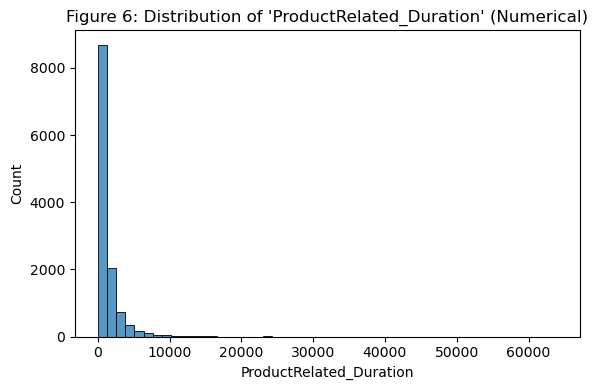

In [13]:
# Column to plot
col = 'ProductRelated_Duration'

plt.figure(figsize=(6, 4))

# Create a histogram for the numerical column
sns.histplot(data=df, x=col, bins=50)

# Set the plot title
plt.title(f"Figure 6: Distribution of '{col}' (Numerical)")

plt.xlabel(col)
plt.ylabel('Count')

plt.tight_layout()
plt.show()

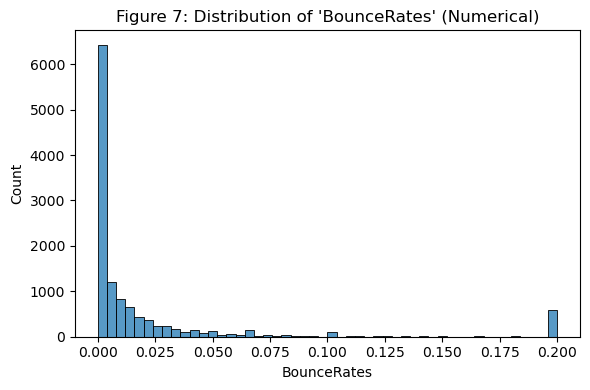

In [14]:
# Column to plot
col = 'BounceRates'

plt.figure(figsize=(6, 4))

# Create a histogram for the numerical column
sns.histplot(data=df, x=col, bins=50)

# Set the plot title
plt.title(f"Figure 7: Distribution of '{col}' (Numerical)")

plt.xlabel(col)
plt.ylabel('Count')

plt.tight_layout()
plt.show()

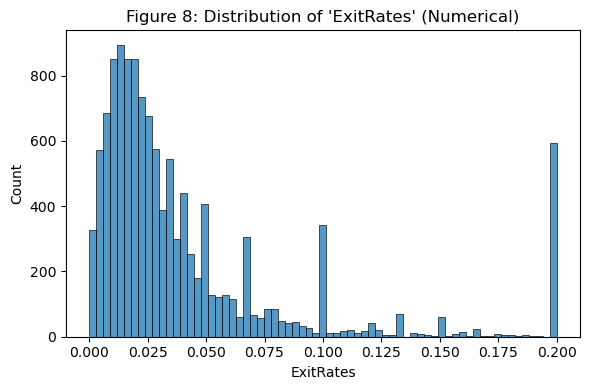

In [15]:
# Column to plot
col = 'ExitRates'

plt.figure(figsize=(6, 4))

# Create a histogram for the numerical column
sns.histplot(data=df, x=col)

# Set the plot title
plt.title(f"Figure 8: Distribution of '{col}' (Numerical)")

plt.xlabel(col)
plt.ylabel('Count')

plt.tight_layout()
plt.show()

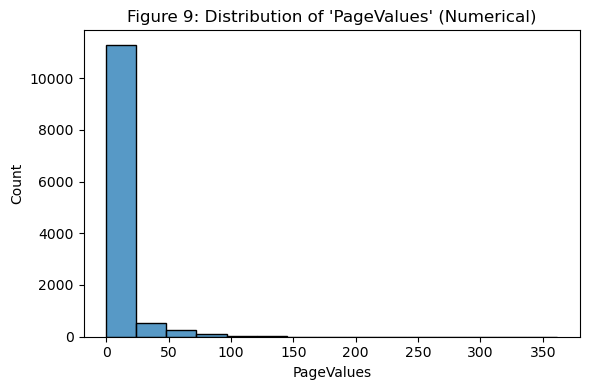

In [16]:
# Column to plot
col = 'PageValues'

plt.figure(figsize=(6, 4))

# Create a histogram for the numerical column
sns.histplot(data=df, x=col)

# Set the plot title
plt.title(f"Figure 9: Distribution of '{col}' (Numerical)")

plt.xlabel(col)
plt.ylabel('Count')

plt.tight_layout()
plt.show()

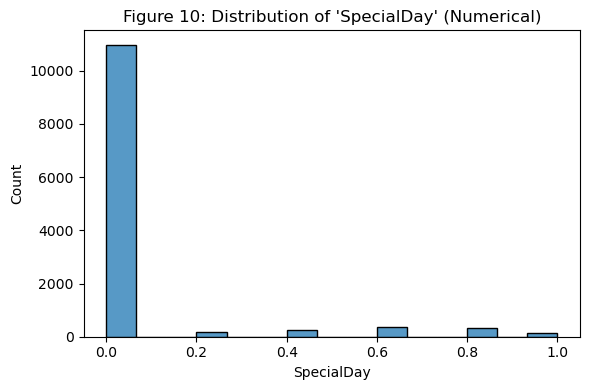

In [17]:
# Column to plot
col = 'SpecialDay'

plt.figure(figsize=(6, 4))

# Create a histogram for the numerical column
sns.histplot(data=df, x=col)

# Set the plot title
plt.title(f"Figure 10: Distribution of '{col}' (Numerical)")

plt.xlabel(col)
plt.ylabel('Count')

plt.tight_layout()
plt.show()

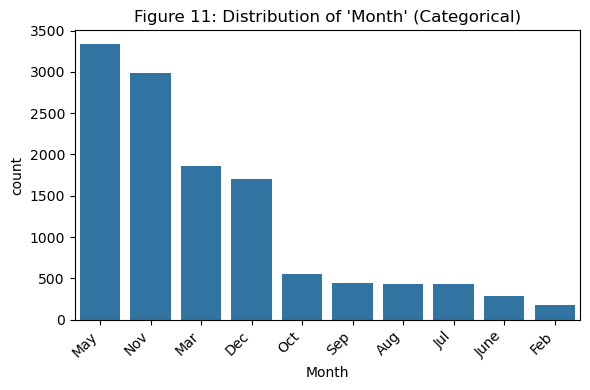

In [18]:
col = 'Month'

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x=col, order=df[col].value_counts().index)
plt.title(f"Figure 11: Distribution of '{col}' (Categorical)")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

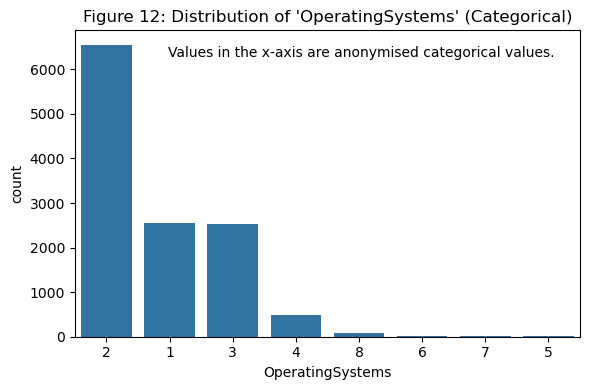

In [19]:
col = 'OperatingSystems'

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x=col, order=df[col].value_counts().index)
plt.title(f"Figure 12: Distribution of '{col}' (Categorical)")
plt.xticks(rotation=0)
plt.text(
    0.95, 0.95, 
    'Values in the x-axis are anonymised categorical values.', 
    transform=plt.gca().transAxes, 
    ha='right', va='top', 
    bbox=dict(facecolor='white', edgecolor='none')
    )

plt.tight_layout()
plt.show()

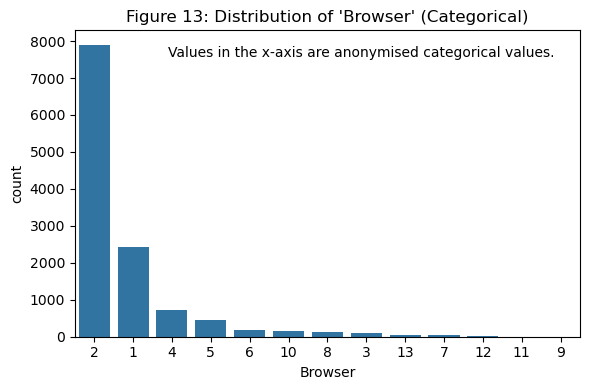

In [20]:
col = 'Browser'

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x=col, order=df[col].value_counts().index)
plt.title(f"Figure 13: Distribution of '{col}' (Categorical)")
plt.xticks(rotation=0)
plt.text(
    0.95, 0.95, 
    'Values in the x-axis are anonymised categorical values.', 
    transform=plt.gca().transAxes, 
    ha='right', va='top', 
    bbox=dict(facecolor='white', edgecolor='none')
    )

plt.tight_layout()
plt.show()

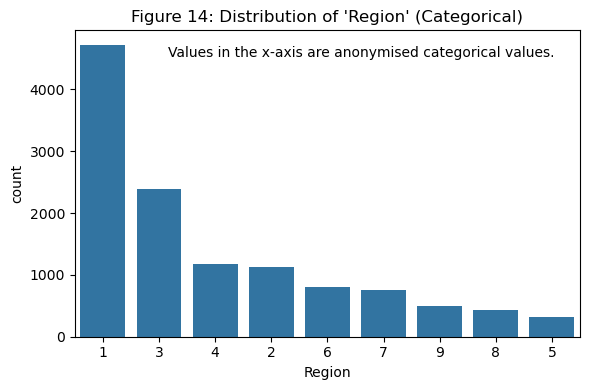

In [21]:
col = 'Region'

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x=col, order=df[col].value_counts().index)
plt.title(f"Figure 14: Distribution of '{col}' (Categorical)")
plt.xticks(rotation=0)
plt.text(
    0.95, 0.95, 
    'Values in the x-axis are anonymised categorical values.', 
    transform=plt.gca().transAxes, 
    ha='right', va='top', 
    bbox=dict(facecolor='white', edgecolor='none')
    )

plt.tight_layout()
plt.show()

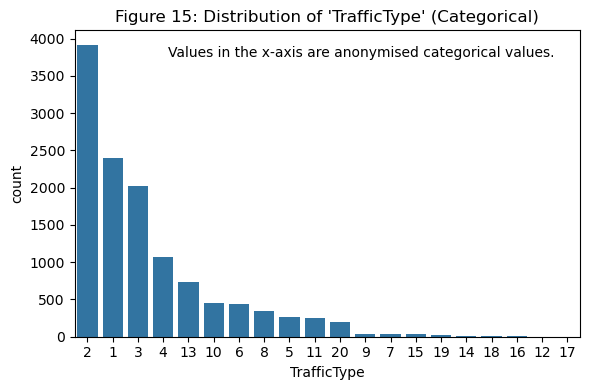

In [22]:
col = 'TrafficType'

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x=col, order=df[col].value_counts().index)
plt.title(f"Figure 15: Distribution of '{col}' (Categorical)")
plt.xticks(rotation=0)
plt.text(
    0.95, 0.95, 
    'Values in the x-axis are anonymised categorical values.', 
    transform=plt.gca().transAxes, 
    ha='right', va='top', 
    bbox=dict(facecolor='white', edgecolor='none')
    )

plt.tight_layout()
plt.show()

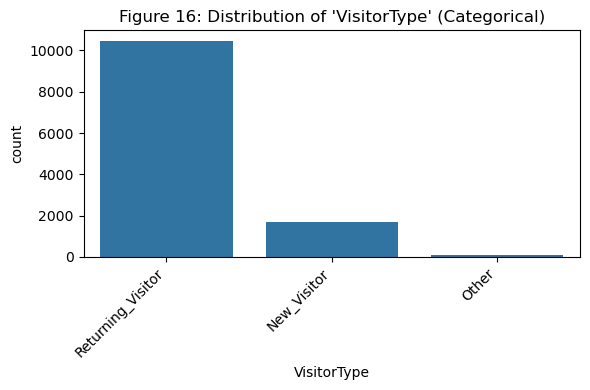

In [23]:
col = 'VisitorType'

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x=col, order=df[col].value_counts().index)
plt.title(f"Figure 16: Distribution of '{col}' (Categorical)")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

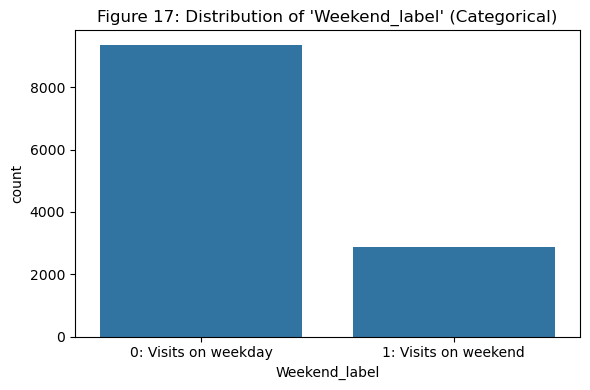

In [24]:
# Map numeric values to descriptive labels
df['Weekend_label'] = df['Weekend'].map({0: '0: Visits on weekday', 1: '1: Visits on weekend'})

col = 'Weekend_label'

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index)
plt.title(f"Figure 17: Distribution of '{col}' (Categorical)")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

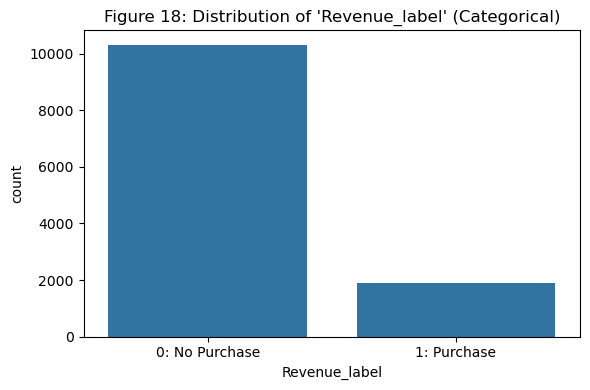

In [25]:
# Map numeric values to descriptive labels
df['Revenue_label'] = df['Revenue'].map({0: '0: No Purchase', 1: '1: Purchase'})

col = 'Revenue_label'

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index)
plt.title(f"Figure 18: Distribution of '{col}' (Categorical)")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

### Up to this point, we can see that the distributions for the numerical variables are extremely right skewed.

## Let's check the number of samples that are outliers using the IQR method

In [26]:
# Function to identify outliers
def identify_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((data < lower_bound) | (data > upper_bound))


No. of outliers for Administrative:
  Outliers: 404 (3.30%)


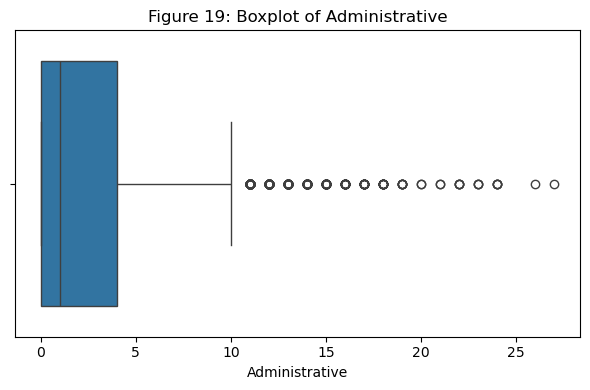

In [27]:
# 'Administrative' feature boxplot & no. of outliers
col = 'Administrative'

outliers = identify_outliers(df[col])
print(f"\nNo. of outliers for {col}:")
print(f"  Outliers: {outliers.sum()} ({outliers.sum() / len(df) * 100:.2f}%)")

plt.figure(figsize=(6, 4))
sns.boxplot(x=df[col])
plt.title(f'Figure 19: Boxplot of {col}')
plt.xlabel(col)
plt.tight_layout()
plt.show()


No. of outliers for Administrative_Duration:
  Outliers: 1150 (9.41%)


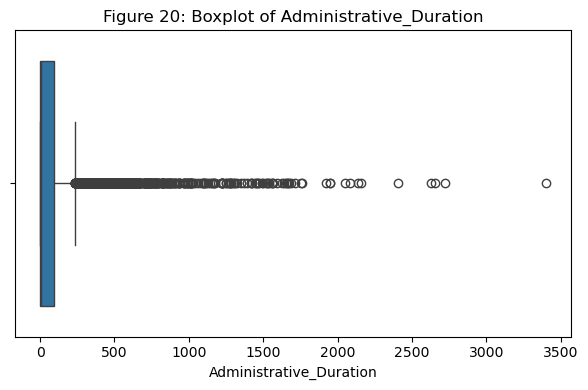

In [28]:
# 'Administrative_Duration' feature boxplot & no. of outliers
col = 'Administrative_Duration'

outliers = identify_outliers(df[col])
print(f"\nNo. of outliers for {col}:")
print(f"  Outliers: {outliers.sum()} ({outliers.sum() / len(df) * 100:.2f}%)")

plt.figure(figsize=(6, 4))
sns.boxplot(x=df[col])
plt.title(f'Figure 20: Boxplot of {col}')
plt.xlabel(col)
plt.tight_layout()
plt.show()


No. of outliers for Informational:
  Outliers: 2634 (21.55%)


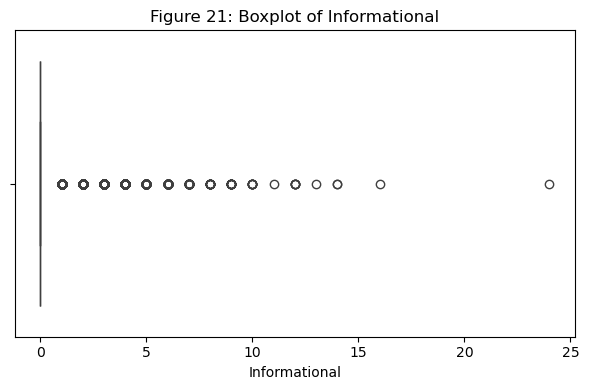

In [29]:
# 'Informational' feature boxplot & no. of outliers
col = 'Informational'

outliers = identify_outliers(df[col])
print(f"\nNo. of outliers for {col}:")
print(f"  Outliers: {outliers.sum()} ({outliers.sum() / len(df) * 100:.2f}%)")

plt.figure(figsize=(6, 4))
sns.boxplot(x=df[col])
plt.title(f'Figure 21: Boxplot of {col}')
plt.xlabel(col)
plt.tight_layout()
plt.show()


No. of outliers for Informational_Duration:
  Outliers: 2408 (19.70%)


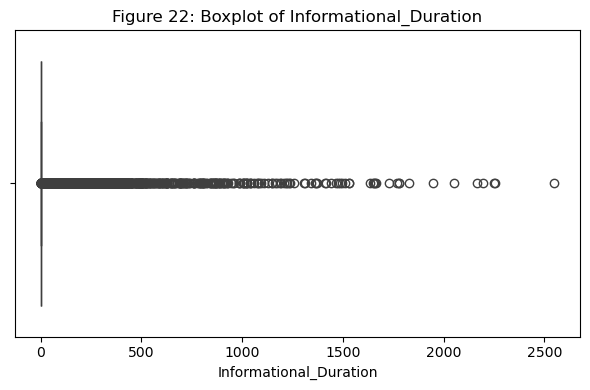

In [30]:
# 'Informational_Duration' feature boxplot & no. of outliers
col = 'Informational_Duration'

outliers = identify_outliers(df[col])
print(f"\nNo. of outliers for {col}:")
print(f"  Outliers: {outliers.sum()} ({outliers.sum() / len(df) * 100:.2f}%)")

plt.figure(figsize=(6, 4))
sns.boxplot(x=df[col])
plt.title(f'Figure 22: Boxplot of {col}')
plt.xlabel(col)
plt.tight_layout()
plt.show()


No. of outliers for ProductRelated:
  Outliers: 1008 (8.25%)


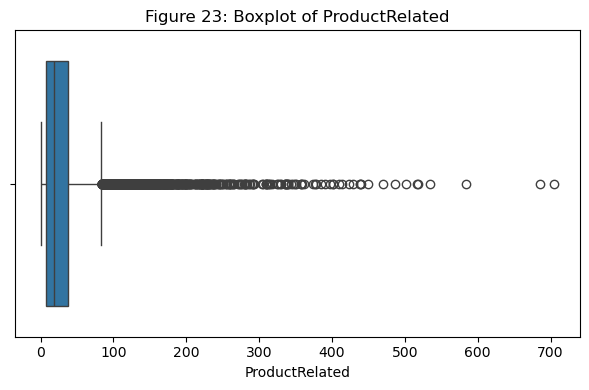

In [31]:
# 'ProductRelated' feature boxplot & no. of outliers
col = 'ProductRelated'

outliers = identify_outliers(df[col])
print(f"\nNo. of outliers for {col}:")
print(f"  Outliers: {outliers.sum()} ({outliers.sum() / len(df) * 100:.2f}%)")

plt.figure(figsize=(6, 4))
sns.boxplot(x=df[col])
plt.title(f'Figure 23: Boxplot of {col}')
plt.xlabel(col)
plt.tight_layout()
plt.show()


No. of outliers for ProductRelated_Duration:
  Outliers: 952 (7.79%)


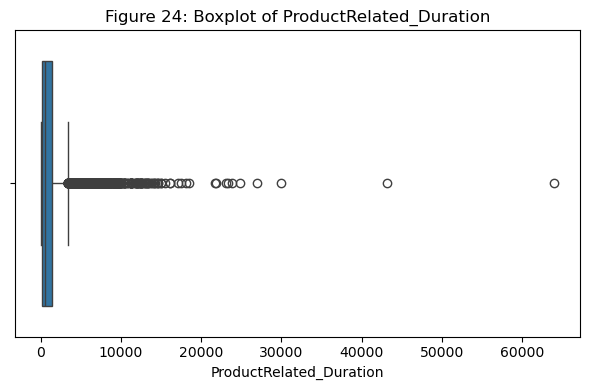

In [32]:
# 'ProductRelated_Duration' feature boxplot & no. of outliers
col = 'ProductRelated_Duration'

outliers = identify_outliers(df[col])
print(f"\nNo. of outliers for {col}:")
print(f"  Outliers: {outliers.sum()} ({outliers.sum() / len(df) * 100:.2f}%)")

plt.figure(figsize=(6, 4))
sns.boxplot(x=df[col])
plt.title(f'Figure 24: Boxplot of {col}')
plt.xlabel(col)
plt.tight_layout()
plt.show()


No. of outliers for BounceRates:
  Outliers: 1437 (11.76%)


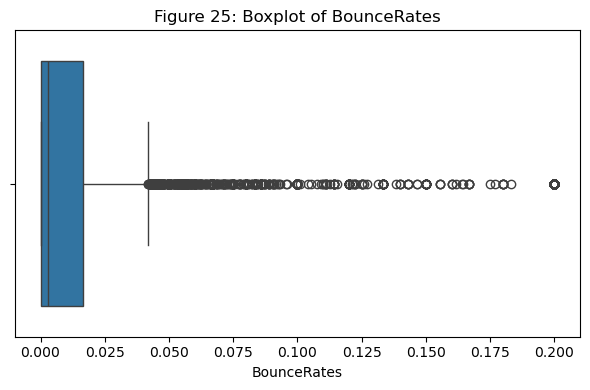

In [33]:
# 'BounceRates' feature boxplot & no. of outliers
col = 'BounceRates'

outliers = identify_outliers(df[col])
print(f"\nNo. of outliers for {col}:")
print(f"  Outliers: {outliers.sum()} ({outliers.sum() / len(df) * 100:.2f}%)")

plt.figure(figsize=(6, 4))
sns.boxplot(x=df[col])
plt.title(f'Figure 25: Boxplot of {col}')
plt.xlabel(col)
plt.tight_layout()
plt.show()


No. of outliers for PageValues:
  Outliers: 2600 (21.27%)


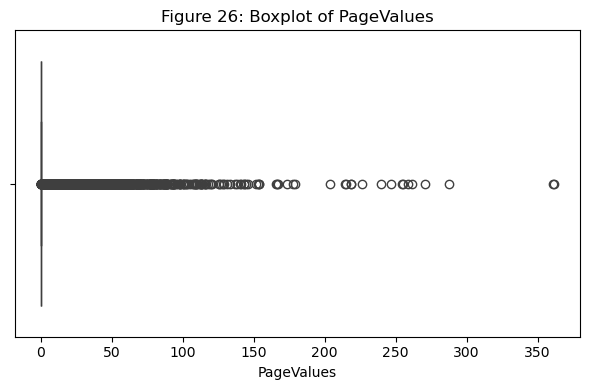

In [34]:
# 'PageValues' feature boxplot & no. of outliers
col = 'PageValues'

outliers = identify_outliers(df[col])
print(f"\nNo. of outliers for {col}:")
print(f"  Outliers: {outliers.sum()} ({outliers.sum() / len(df) * 100:.2f}%)")

plt.figure(figsize=(6, 4))
sns.boxplot(x=df[col])
plt.title(f'Figure 26: Boxplot of {col}')
plt.xlabel(col)
plt.tight_layout()
plt.show()


No. of outliers for SpecialDay:
  Outliers: 1252 (10.24%)


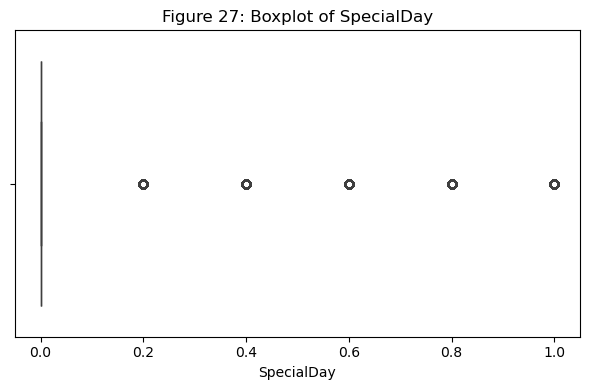

In [35]:
# 'SpecialDay' feature boxplot & no. of outliers
col = 'SpecialDay'

outliers = identify_outliers(df[col])
print(f"\nNo. of outliers for {col}:")
print(f"  Outliers: {outliers.sum()} ({outliers.sum() / len(df) * 100:.2f}%)")

plt.figure(figsize=(6, 4))
sns.boxplot(x=df[col])
plt.title(f'Figure 27: Boxplot of {col}')
plt.xlabel(col)
plt.tight_layout()
plt.show()

In [36]:
# Calculate total samples with outliers
numerical_vars = [
    'Administrative', 'Administrative_Duration', 'Informational',
    'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'
]

samples_with_outliers = df[numerical_vars].apply(identify_outliers).any(axis=1) #axis=1 ius column wise
total_outlier_samples = samples_with_outliers.sum()

print(f"\nTotal samples with at least one outlier: {total_outlier_samples}")
print(f"Percentage of samples with outliers: {(total_outlier_samples / len(df)) * 100:.2f}%")


Total samples with at least one outlier: 6897
Percentage of samples with outliers: 56.42%


## There are a lot of outliers in this dataset... what if we try log transformation to try transforming the data to look more like a normal distribution?

In [37]:
# List of numerical variables
numerical_vars = [
    'Administrative', 'Administrative_Duration', 'Informational',
    'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'
]

# Create a new dataframe for log-transformed features
df_log = df.copy()

# Apply log transformation
for var in numerical_vars:
    df_log[var] = np.log1p(df[var])

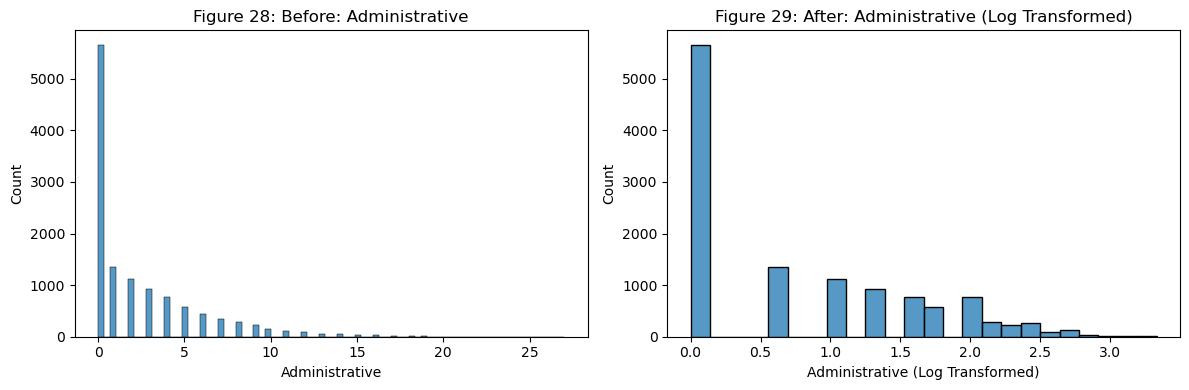

In [38]:
# 'Administrative' variable before and after log transformation
col = 'Administrative'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], ax=ax1)
ax1.set_title(f'Figure 28: Before: {col}')
ax1.set_xlabel(f'{col}')

sns.histplot(df_log[col], ax=ax2)
ax2.set_title(f'Figure 29: After: {col} (Log Transformed)')
ax2.set_xlabel(f'{col} (Log Transformed)')

plt.tight_layout()
plt.show()

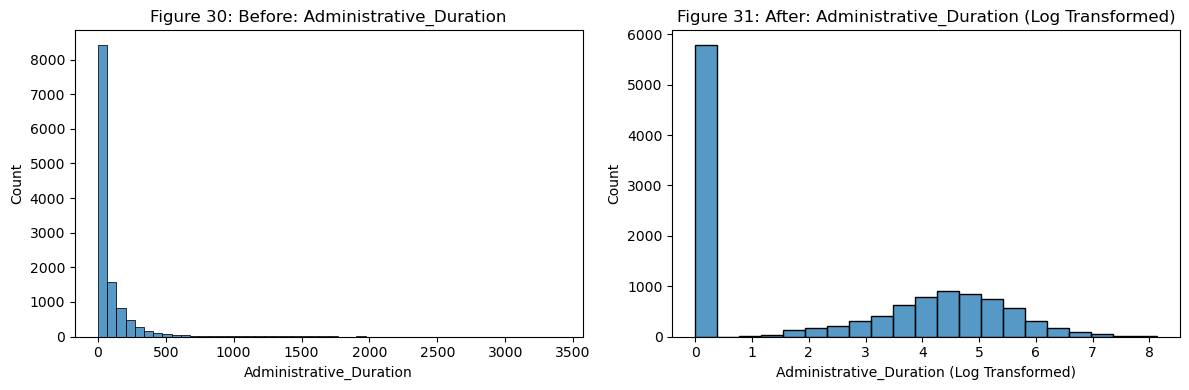

In [39]:
# 'Administrative_Duration' variable before and after log transformation
col = 'Administrative_Duration'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], ax=ax1, bins=50)
ax1.set_title(f'Figure 30: Before: {col}')
ax1.set_xlabel(f'{col}')

sns.histplot(df_log[col], ax=ax2)
ax2.set_title(f'Figure 31: After: {col} (Log Transformed)')
ax2.set_xlabel(f'{col} (Log Transformed)')

plt.tight_layout()
plt.show()

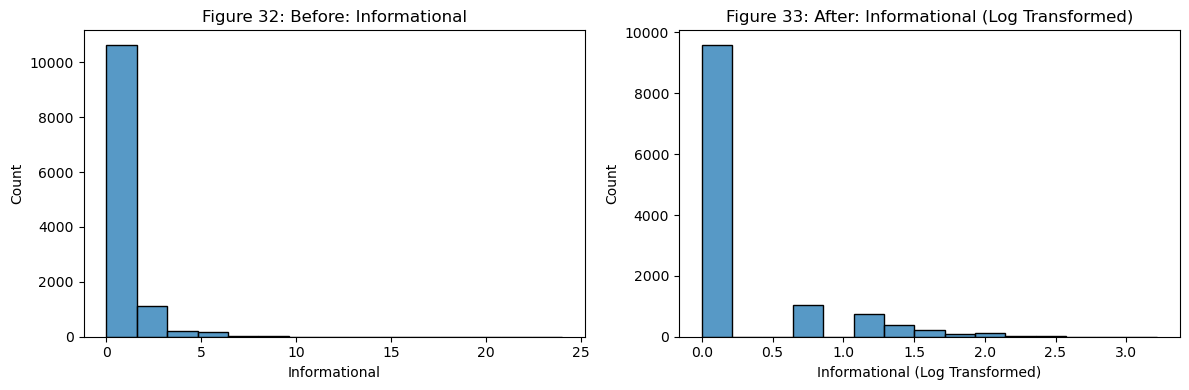

In [40]:
# 'Informational' variable before and after log transformation
col = 'Informational'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], ax=ax1)
ax1.set_title(f'Figure 32: Before: {col}')
ax1.set_xlabel(f'{col}')

sns.histplot(df_log[col], ax=ax2)
ax2.set_title(f'Figure 33: After: {col} (Log Transformed)')
ax2.set_xlabel(f'{col} (Log Transformed)')

plt.tight_layout()
plt.show()

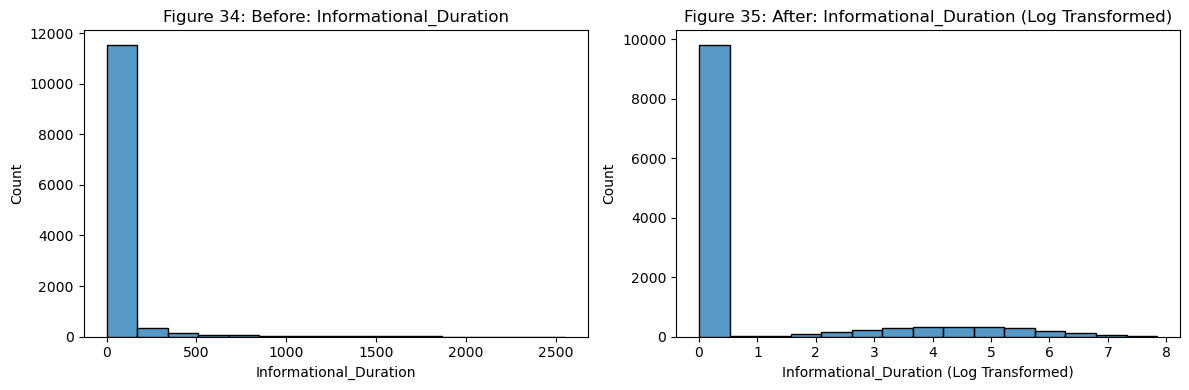

In [41]:
# 'Informational_Duration' variable before and after log transformation
col = 'Informational_Duration'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], ax=ax1)
ax1.set_title(f'Figure 34: Before: {col}')
ax1.set_xlabel(f'{col}')

sns.histplot(df_log[col], ax=ax2)
ax2.set_title(f'Figure 35: After: {col} (Log Transformed)')
ax2.set_xlabel(f'{col} (Log Transformed)')

plt.tight_layout()
plt.show()

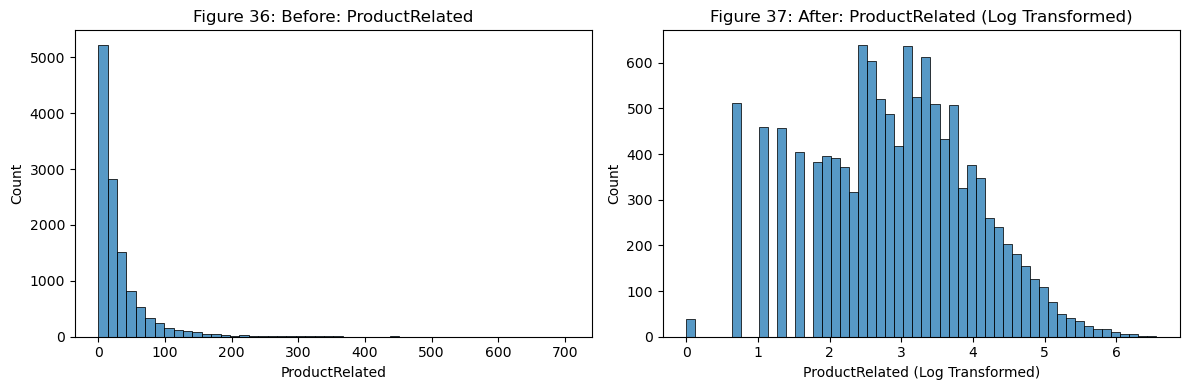

In [42]:
# 'ProductRelated' variable before and after log transformation
col = 'ProductRelated'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], ax=ax1, bins=50)
ax1.set_title(f'Figure 36: Before: {col}')
ax1.set_xlabel(f'{col}')

sns.histplot(df_log[col], ax=ax2)
ax2.set_title(f'Figure 37: After: {col} (Log Transformed)')
ax2.set_xlabel(f'{col} (Log Transformed)')

plt.tight_layout()
plt.show()

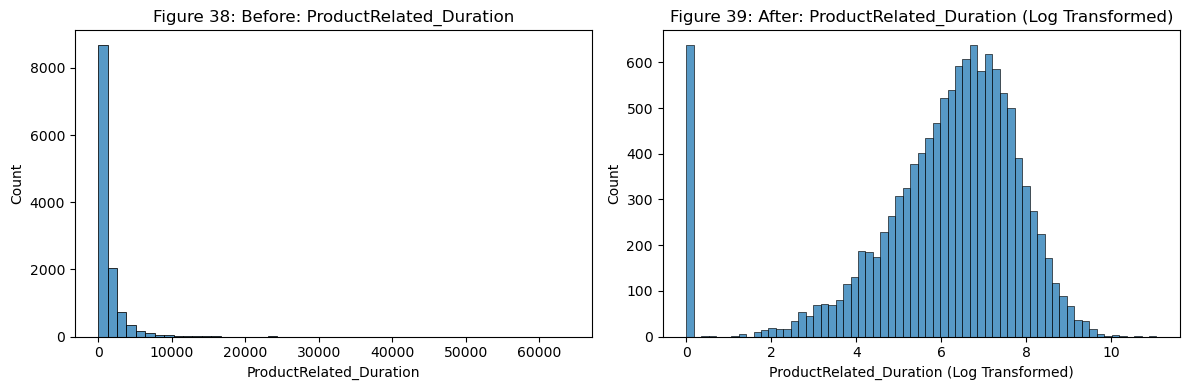

In [43]:
# 'ProductRelated_Duration' variable before and after log transformation
col = 'ProductRelated_Duration'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], ax=ax1, bins=50)
ax1.set_title(f'Figure 38: Before: {col}')
ax1.set_xlabel(f'{col}')

sns.histplot(df_log[col], ax=ax2)
ax2.set_title(f'Figure 39: After: {col} (Log Transformed)')
ax2.set_xlabel(f'{col} (Log Transformed)')

plt.tight_layout()
plt.show()

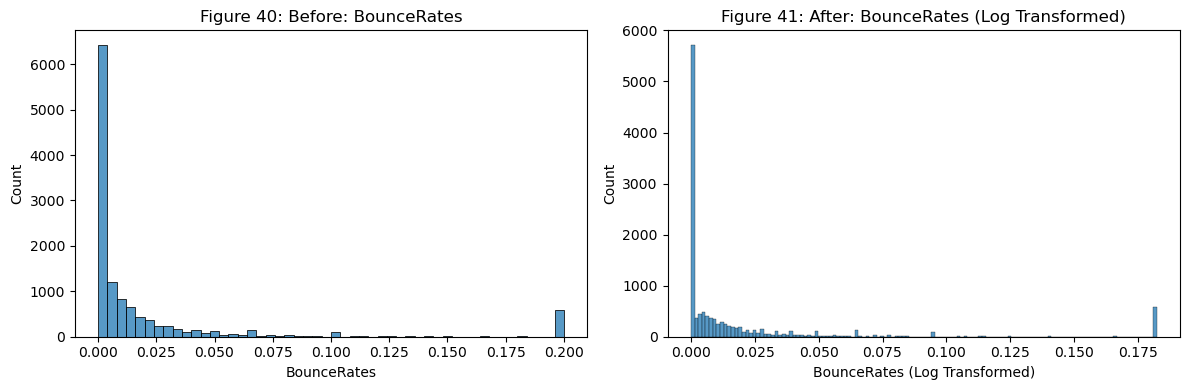

In [44]:
# 'BounceRates' variable before and after log transformation
col = 'BounceRates'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], ax=ax1, bins=50)
ax1.set_title(f'Figure 40: Before: {col}')
ax1.set_xlabel(f'{col}')

sns.histplot(df_log[col], ax=ax2)
ax2.set_title(f'Figure 41: After: {col} (Log Transformed)')
ax2.set_xlabel(f'{col} (Log Transformed)')

plt.tight_layout()
plt.show()

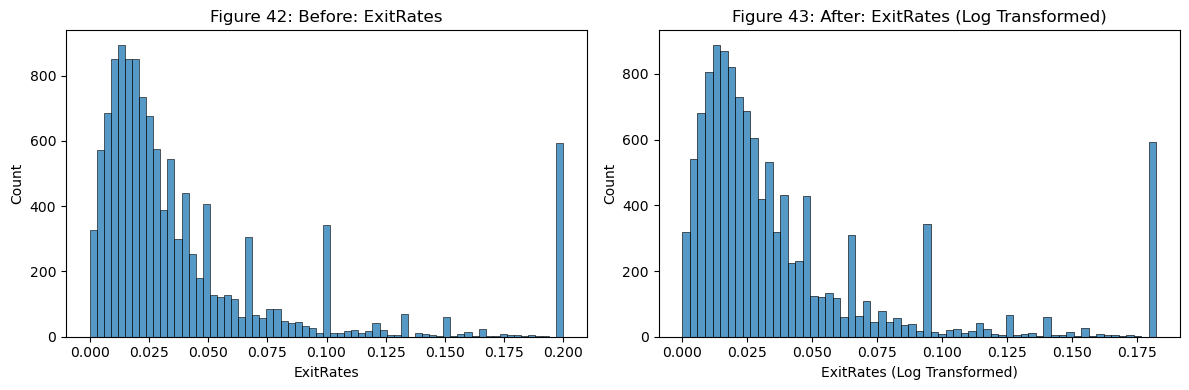

In [45]:
# 'ExitRates' variable before and after log transformation
col = 'ExitRates'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], ax=ax1)
ax1.set_title(f'Figure 42: Before: {col}')
ax1.set_xlabel(f'{col}')

sns.histplot(df_log[col], ax=ax2)
ax2.set_title(f'Figure 43: After: {col} (Log Transformed)')
ax2.set_xlabel(f'{col} (Log Transformed)')

plt.tight_layout()
plt.show()

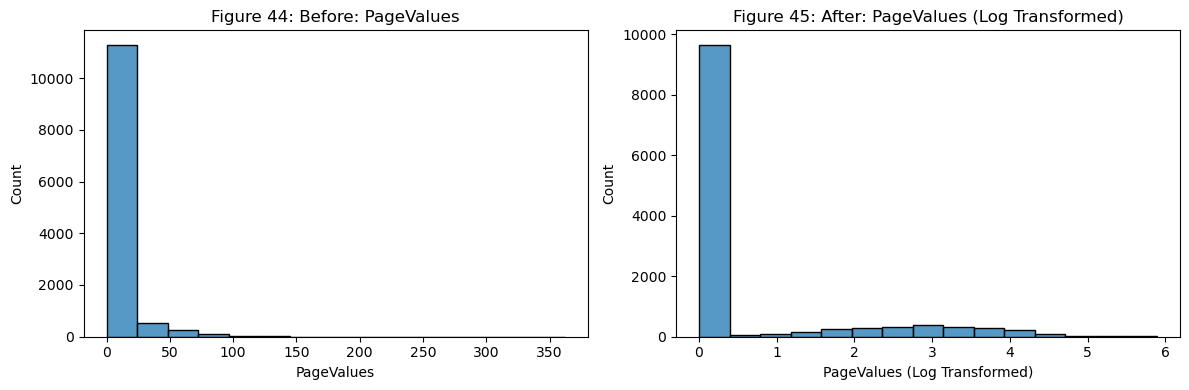

In [46]:
# 'PageValues' variable before and after log transformation
col = 'PageValues'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], ax=ax1)
ax1.set_title(f'Figure 44: Before: {col}')
ax1.set_xlabel(f'{col}')

sns.histplot(df_log[col], ax=ax2)
ax2.set_title(f'Figure 45: After: {col} (Log Transformed)')
ax2.set_xlabel(f'{col} (Log Transformed)')

plt.tight_layout()
plt.show()

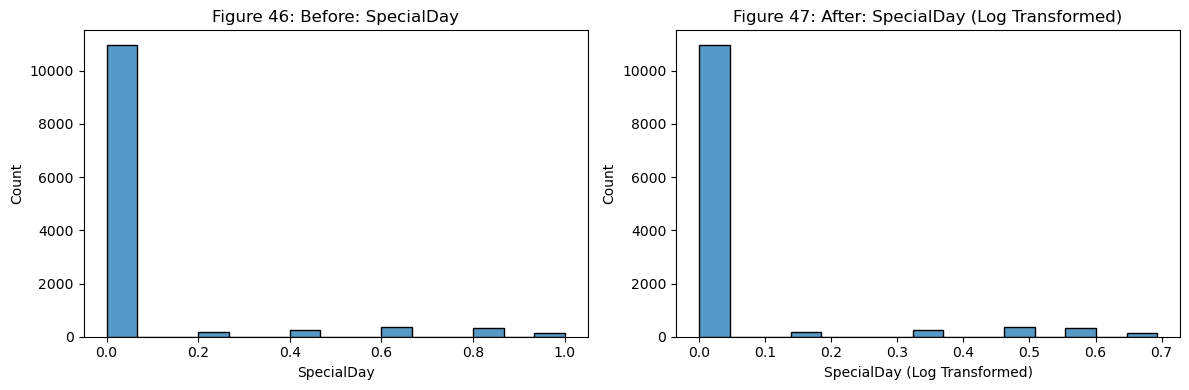

In [47]:
# 'SpecialDay' variable before and after log transformation
col = 'SpecialDay'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], ax=ax1)
ax1.set_title(f'Figure 46: Before: {col}')
ax1.set_xlabel(f'{col}')

sns.histplot(df_log[col], ax=ax2)
ax2.set_title(f'Figure 47: After: {col} (Log Transformed)')
ax2.set_xlabel(f'{col} (Log Transformed)')

plt.tight_layout()
plt.show()

### For some features.. Distributions and skews above don't really change much (or even at all) when comparing to pre-log transformation and post log transfomation... Let's confirm if the number of outliers has indeed changed

In [48]:
# Calculate total samples with outliers
samples_with_outliers = df_log[numerical_vars].apply(identify_outliers).any(axis=1)
total_outlier_samples = samples_with_outliers.sum()

print(f"\nTotal samples with at least one outlier after log transformation: {total_outlier_samples}")
print(f"Percentage of samples with outliers after log transformation: {(total_outlier_samples / len(df_log)) * 100:.2f}%")


Total samples with at least one outlier after log transformation: 6335
Percentage of samples with outliers after log transformation: 51.82%


The number of outliers has has only reduced slightly by 4-5%... it could be due to the fact that our dataset has too many values with "0" that caused this... 

Outliers could be a notable feature due to the nature of the behaviour of shoppers visiting the website.

It may be best not to delete the outliers as they may be legitimate values.

### It is quite interesting to note that site visits are high in the months of March, May, November, and December.

### It is understood that for May, it could be a preparation for the holidays in June. While for November and December, the visits could be high due to end of year holidays and festivities.

### It is unclear why March has a moderately high visit rate. The dataset's description nor the introductory paper did not describe from which country the data was obtained from. It is postulated that a festival might have happened during March or April.

### For Administrative, Administrative_Duration, Informational, Informational_Duration, a plausible explaintation for many "0"s is that pages with administrative (eg, account settings) and informational (eg, FAQs, about us) are not frequently visited.

### For ProductRelated, ProductRelated_Duration, a plausible explanation is that while there are still some "0" values, the frequency of pages that do not have "0"s appear to be higher than administative / informational. As people tend to visit pages with product information more often than administrative / informational pages

### For Bounce rates, majority of "0" indicate that visitors tend to engage with the website in some way and nagivate through multiple pages, which = high engagement

### For Exit rates, majority of "0" indicates that users tend to navigate further into the site.

# Bivariate Analysis

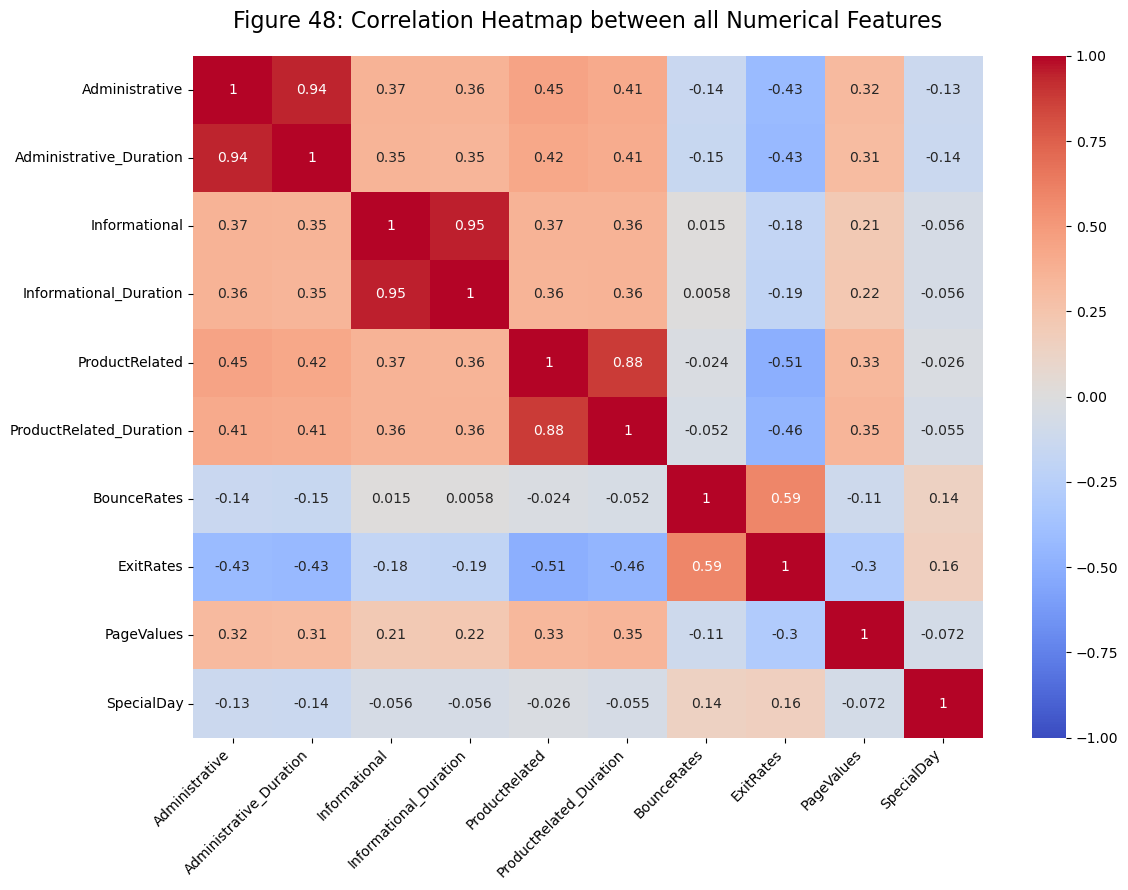

In [49]:
numerical_columns = ["Administrative", "Administrative_Duration", "Informational", "Informational_Duration", "ProductRelated",
                     "ProductRelated_Duration", "BounceRates", "ExitRates", "PageValues", "SpecialDay"]
num_df = df[numerical_columns]

plt.figure(figsize=(12,9))
sns.heatmap(num_df.corr(method='spearman'), cmap='coolwarm', annot=True, vmin=-1, vmax=1)  # use spearman's correlation as our numerical variables are extremely right skewed

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Add the title with the figure number
plt.title("Figure 48: Correlation Heatmap between all Numerical Features", fontsize=16, pad=20)

# Adjust layout to prevent cutting off the top of the plot
plt.tight_layout()

# Display the plot
plt.show()

### The following columns appear to be highly correlated:

### Administative & Administrative_Duration
### Informational & Informational_Duration
### ProductRelated & ProductRelated_Duration

### It seems that the more pages a user visits, there is a greater tendency for the user to spend more time visiting the pages as well.

### We can consider dropping Administrative_Duration, Informational_Duration, & ProductRelated_Duration to minimise multicollinearity.

# Explore the correlation between Revenue (which is technically a categorical variable) and all numerical variables using point biserial correlation

### Point Biserial Correlation is used when we want to measure the relationship between a continuous variable and a binary variable

## Calculate correlation coefficients and P-values:

In [50]:
# Calculating point-biserial correlation
administrative_correlation, p_value = stats.pointbiserialr(df['Administrative'], df['Revenue'])
print("Point-Biserial Correlation Coefficient:", administrative_correlation)
print("P-value:", p_value)

Point-Biserial Correlation Coefficient: 0.13649086185231232
P-value: 6.488893354956241e-52


In [51]:
# Calculating point-biserial correlation
administrative_duration_correlation, p_value = stats.pointbiserialr(df['Administrative_Duration'], df['Revenue'])
print("Point-Biserial Correlation Coefficient:", administrative_duration_correlation)
print("P-value:", p_value)

Point-Biserial Correlation Coefficient: 0.09192627413429033
P-value: 2.335101492633904e-24


In [52]:
# Calculating point-biserial correlation
informational_correlation, p_value = stats.pointbiserialr(df['Informational'], df['Revenue'])
print("Point-Biserial Correlation Coefficient:", informational_correlation)
print("P-value:", p_value)

Point-Biserial Correlation Coefficient: 0.09393191698425632
P-value: 2.2970700895440216e-25


In [53]:
# Calculating point-biserial correlation
informational_duration_correlation, p_value = stats.pointbiserialr(df['Informational_Duration'], df['Revenue'])
print("Point-Biserial Correlation Coefficient:", informational_duration_correlation)
print("P-value:", p_value)

Point-Biserial Correlation Coefficient: 0.06945015044571105
P-value: 1.505561866499814e-14


In [54]:
# Calculating point-biserial correlation
productrelated_correlation, p_value = stats.pointbiserialr(df['ProductRelated'], df['Revenue'])
print("Point-Biserial Correlation Coefficient:", productrelated_correlation)
print("P-value:", p_value)

Point-Biserial Correlation Coefficient: 0.15632940906280016
P-value: 9.932319225640801e-68


In [55]:
# Calculating point-biserial correlation
productrelated_duration_correlation, p_value = stats.pointbiserialr(df['ProductRelated_Duration'], df['Revenue'])
print("Point-Biserial Correlation Coefficient:", productrelated_duration_correlation)
print("P-value:", p_value)

Point-Biserial Correlation Coefficient: 0.15051024771743537
P-value: 7.353363482386516e-63


In [56]:
# Calculating point-biserial correlation
bouncerates_correlation, p_value = stats.pointbiserialr(df['BounceRates'], df['Revenue'])
print("Point-Biserial Correlation Coefficient:", bouncerates_correlation)
print("P-value:", p_value)

Point-Biserial Correlation Coefficient: -0.14534995764611885
P-value: 1.0570458648547763e-58


In [57]:
# Calculating point-biserial correlation
exitrates_correlation, p_value = stats.pointbiserialr(df['ExitRates'], df['Revenue'])
print("Point-Biserial Correlation Coefficient:", exitrates_correlation)
print("P-value:", p_value)

Point-Biserial Correlation Coefficient: -0.2043949921341944
P-value: 1.9433426678230365e-115


In [58]:
# Calculating point-biserial correlation
pagevalues_correlation, p_value = stats.pointbiserialr(df['PageValues'], df['Revenue'])
print("Point-Biserial Correlation Coefficient:", pagevalues_correlation)
print("P-value:", p_value)

Point-Biserial Correlation Coefficient: 0.47728900689834997
P-value: 0.0


In [59]:
# Calculating point-biserial correlation
specialday_correlation, p_value = stats.pointbiserialr(df['SpecialDay'], df['Revenue'])
print("Point-Biserial Correlation Coefficient:", specialday_correlation)
print("P-value:", p_value)

Point-Biserial Correlation Coefficient: -0.0836643913662079
P-value: 1.9431033562297723e-20


## All point biserial correlations are statistically significant (p-values are less than 0.05), let's create a heatmap for this

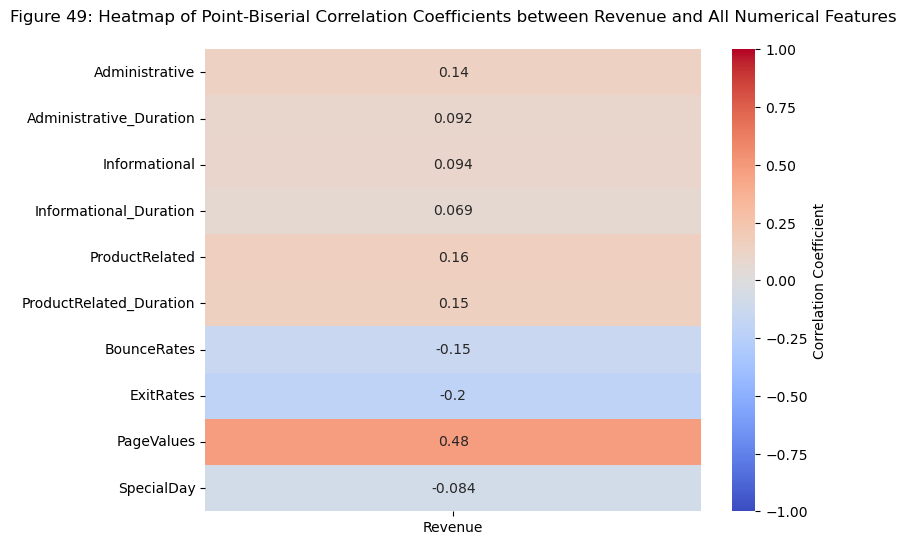

In [60]:
# Create a DataFrame for the point-biserial correlation results
data = {
    'Revenue': [
        administrative_correlation,
        administrative_duration_correlation,
        informational_correlation,
        informational_duration_correlation,
        productrelated_correlation,
        productrelated_duration_correlation,
        bouncerates_correlation,
        exitrates_correlation,
        pagevalues_correlation,
        specialday_correlation
    ]
}

index_labels = [
    'Administrative',
    'Administrative_Duration',
    'Informational',
    'Informational_Duration',
    'ProductRelated',
    'ProductRelated_Duration',
    'BounceRates',
    'ExitRates',
    'PageValues',
    'SpecialDay'
]

# Creating the DataFrame
point_biserial_correlation_df = pd.DataFrame(data, index=index_labels)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(point_biserial_correlation_df, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'},
            vmin=-1, vmax=1)
plt.title('Figure 49: Heatmap of Point-Biserial Correlation Coefficients between Revenue and All Numerical Features', pad=20)
plt.show()

# Explore the association between Revenue (which is technically a categorical variable) and all other categorical variables using Cramer's V association

## Check for association between Revenue and all other categorical variables

In [61]:
# Create a contingency table
table_month_revenue = pd.crosstab(df['Month'], df['Revenue'])

# Perform Chi-square test
chi2_month_revenue, p_month_revenue, dof_month_revenue, expected_month_revenue = chi2_contingency(table_month_revenue)

# Calculate Cramér's V
n_month_revenue = table_month_revenue.sum().sum()  # Total observations
min_dim_month_revenue = min(table_month_revenue.shape) - 1
cramers_v_month_revenue = np.sqrt(chi2_month_revenue / (n_month_revenue * min_dim_month_revenue))

# Output the results
print("P-value:", p_month_revenue)
print("Cramér's V:", cramers_v_month_revenue)

P-value: 5.639827644560145e-76
Cramér's V: 0.17593286973171482


In [62]:
# Create a contingency table
table_operatingsystems_revenue = pd.crosstab(df['OperatingSystems'], df['Revenue'])

# Perform Chi-square test
chi2_operatingsystems_revenue, p_operatingsystems_revenue, dof_operatingsystems_revenue, expected_operatingsystems_revenue = chi2_contingency(table_operatingsystems_revenue)

# Calculate Cramér's V
n_operatingsystems_revenue = table_operatingsystems_revenue.sum().sum()  # Total observations
min_dim_operatingsystems_revenue = min(table_operatingsystems_revenue.shape) - 1
cramers_v_operatingsystems_revenue = np.sqrt(chi2_operatingsystems_revenue / (n_operatingsystems_revenue * min_dim_operatingsystems_revenue))

# Output the results
print("P-value:", p_operatingsystems_revenue)
print("Cramér's V:", cramers_v_operatingsystems_revenue)

P-value: 1.2500905442654903e-13
Cramér's V: 0.0784824620116331


In [63]:
# Create a contingency table
table_browser_revenue = pd.crosstab(df['Browser'], df['Revenue'])

# Perform Chi-square test
chi2_browser_revenue, p_browser_revenue, dof_browser_revenue, expected_browser_revenue = chi2_contingency(table_browser_revenue)

# Calculate Cramér's V
n_browser_revenue = table_browser_revenue.sum().sum()  # Total observations
min_dim_browser_revenue = min(table_browser_revenue.shape) - 1
cramers_v_browser_revenue = np.sqrt(chi2_browser_revenue / (n_browser_revenue * min_dim_browser_revenue))

# Output the results
print("P-value:", p_browser_revenue)
print("Cramér's V:", cramers_v_browser_revenue)

P-value: 0.0036217113354891843
Cramér's V: 0.04891321619501619


In [64]:
# Create a contingency table
table_region_revenue = pd.crosstab(df['Region'], df['Revenue'])

# Perform Chi-square test
chi2_region_revenue, p_region_revenue, dof_region_revenue, expected_region_revenue = chi2_contingency(table_region_revenue)

# Calculate Cramér's V
n_region_revenue = table_region_revenue.sum().sum()  # Total observations
min_dim_region_revenue = min(table_region_revenue.shape) - 1
cramers_v_region_revenue = np.sqrt(chi2_region_revenue / (n_region_revenue * min_dim_region_revenue))

# Output the results
print("P-value:", p_region_revenue)
print("Cramér's V:", cramers_v_region_revenue)

P-value: 0.2908791757004453
Cramér's V: 0.028088600733099992


In [65]:
# Create a contingency table
table_traffictype_revenue = pd.crosstab(df['TrafficType'], df['Revenue'])

# Perform Chi-square test
chi2_traffictype_revenue, p_traffictype_revenue, dof_traffictype_revenue, expected_traffictype_revenue = chi2_contingency(table_traffictype_revenue)

# Calculate Cramér's V
n_traffictype_revenue = table_traffictype_revenue.sum().sum()  # Total observations
min_dim_traffictype_revenue = min(table_traffictype_revenue.shape) - 1
cramers_v_traffictype_revenue = np.sqrt(chi2_traffictype_revenue / (n_traffictype_revenue * min_dim_traffictype_revenue))

# Output the results
print("P-value:", p_traffictype_revenue)
print("Cramér's V:", cramers_v_traffictype_revenue)

P-value: 4.711314047824595e-65
Cramér's V: 0.17191906893959835


In [66]:
# Create a contingency table
table_visitortype_revenue = pd.crosstab(df['VisitorType'], df['Revenue'])

# Perform Chi-square test
chi2_visitortype_revenue, p_visitortype_revenue, dof_visitortype_revenue, expected_visitortype_revenue = chi2_contingency(table_visitortype_revenue)

# Calculate Cramér's V
n_visitortype_revenue = table_visitortype_revenue.sum().sum()  # Total observations
min_dim_visitortype_revenue = min(table_visitortype_revenue.shape) - 1
cramers_v_visitortype_revenue = np.sqrt(chi2_visitortype_revenue / (n_visitortype_revenue * min_dim_visitortype_revenue))

# Output the results
print("P-value:", p_visitortype_revenue)
print("Cramér's V:", cramers_v_visitortype_revenue)

P-value: 3.2323409627423847e-29
Cramér's V: 0.1036015078350352


In [67]:
# Create a contingency table
table_weekend_revenue = pd.crosstab(df['Weekend'], df['Revenue'])

# Perform Chi-square test
chi2_weekend_revenue, p_weekend_revenue, dof_weekend_revenue, expected_weekend_revenue = chi2_contingency(table_weekend_revenue)

# Calculate Cramér's V
n_weekend_revenue = table_weekend_revenue.sum().sum()  # Total observations
min_dim_weekend_revenue = min(table_weekend_revenue.shape) - 1
cramers_v_weekend_revenue = np.sqrt(chi2_weekend_revenue / (n_weekend_revenue * min_dim_weekend_revenue))

# Output the results
print("P-value:", p_weekend_revenue)
print("Cramér's V:", cramers_v_weekend_revenue)

P-value: 0.002421851297873999
Cramér's V: 0.027431963965365486


## All Cramer's V p-values (except for Region) are statistically significant (p-values are less than 0.05), let's create a heatmap to visualise the associations (leaving out Region)

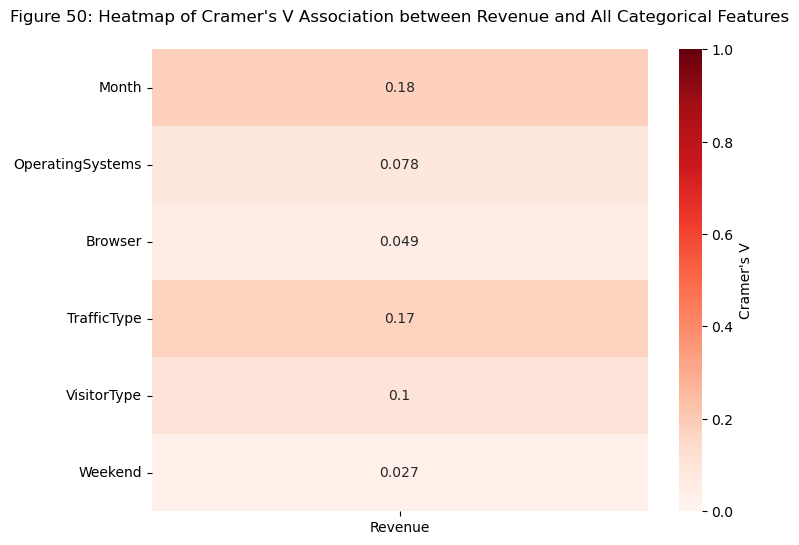

In [68]:
# Create a DataFrame for the cramer's v association results
data = {
    'Revenue': [
        cramers_v_month_revenue,
        cramers_v_operatingsystems_revenue,
        cramers_v_browser_revenue,
        cramers_v_traffictype_revenue,
        cramers_v_visitortype_revenue,
        cramers_v_weekend_revenue
    ]
}

index_labels = [
    'Month',
    'OperatingSystems',
    'Browser',
    'TrafficType',
    'VisitorType',
    'Weekend'
]

# Creating the DataFrame
cramers_v_df = pd.DataFrame(data, index=index_labels)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cramers_v_df, annot=True, cmap='Reds', cbar_kws={'label': "Cramer's V"},
            vmin=0, vmax=1)
plt.title("Figure 50: Heatmap of Cramer's V Association between Revenue and All Categorical Features", pad=20)
plt.show()

# Summary of action steps

## To perform the below before train-test split and training of models:

1. To select these features (based on their correlation and association to the target variable):
- Administrative
- Informational
- ProductRelated
- BounceRates
- ExitRates
- PageValues
- Month
- TrafficType
- VisitorType

Features that can cause multicolinearity, and features that have very low correlation / association (between -0.09 to 0.09) will be excluded in the model training.

2. Min-Max scaling of numerical features (as their values range differently):
- Administrative
- Informational
- ProductRelated
- BounceRates
- ExitRates
- PageValues

3. One-Hot encoding of categorical features:
- Month
- TrafficType
- VisitorType